This project is about analyzing the causes of fires in California, particularly mand-made vs. natural, to attempt to predict when fires might be likelier to occur. This project will be analyzing the scale and location of the fires, comparing those factors to the cause, and attempt to find trends that might indicate when/where a fire is likelier to break out.

[insert rationale for why certain data sets were used and how they were prepared after actually doing the work below]
There are two datasets strictly about fires that are going to be looked at. The first is a record of all fires dating back from 1878, although this will be clipped to 1950 to present to match the data available for lightning occurences in California. Both of these datasets have location data, so we can compare yearly fires and thunderstorm occurences for specific regions. This allows us to understand how much of a threat, in terms of fire likelihood, lightning can be. Additionally, there are two more data sets that analyze small(<5000 acres) and large(>=5000 acres) fires over the past five years, so we can focus on both very broad trends over many years, as well as more recent trends that might better help us predict the immediate future.

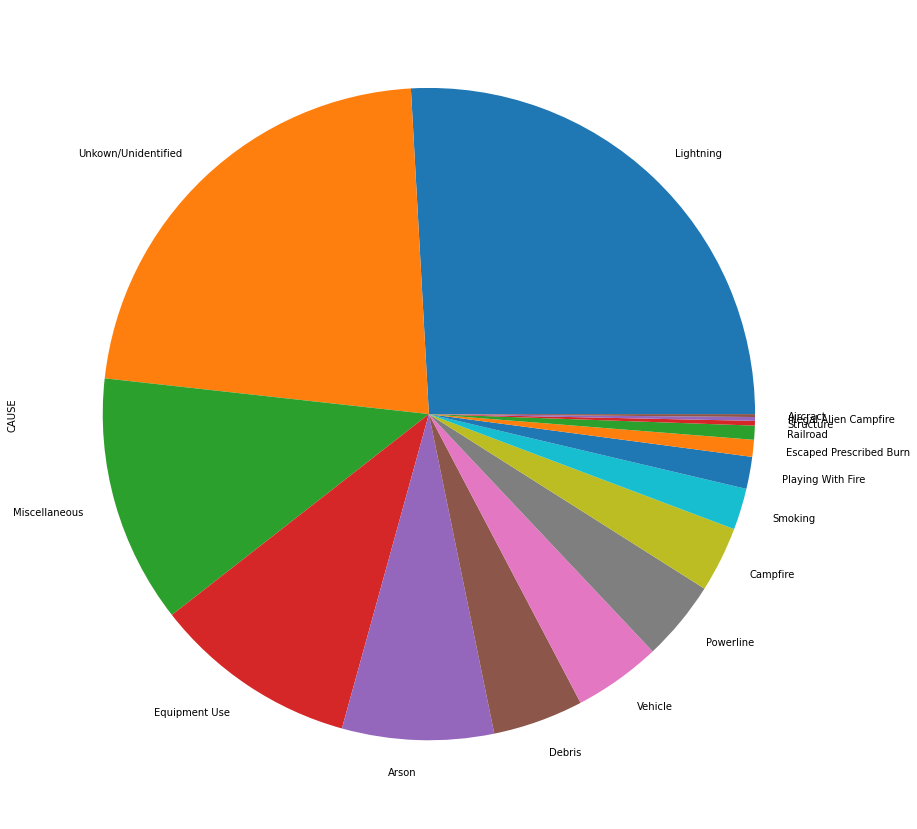

        YEAR_              ALARM_DATE               CONT_DATE  \
0      2020.0  2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1      2020.0  2020/06/01 00:00:00+00  2020/06/04 00:00:00+00   
2      2020.0  2020/08/10 00:00:00+00  2020/03/01 00:00:00+00   
3      2020.0  2020/03/31 00:00:00+00  2020/04/01 00:00:00+00   
4      2020.0  2020/04/14 00:00:00+00  2020/04/19 00:00:00+00   
...       ...                     ...                     ...   
21312  2019.0  2019/10/21 00:00:00+00  2019/10/22 00:00:00+00   
21314  2019.0  2019/10/28 00:00:00+00  2019/10/28 00:00:00+00   
21315  2019.0  2019/11/09 00:00:00+00  2019/11/10 00:00:00+00   
21316  2019.0                     NaN                     NaN   
21317  2019.0  2019/10/10 00:00:00+00  2019/10/31 00:00:00+00   

                         CAUSE    GIS_ACRES                  C_METHOD  \
0                    Powerline   109.602500                GPS Ground   
1                Equipment Use   685.585020                GPS Ground   


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

#Causes
# 1 - Lightning
# 2 - Equipment Use
# 3 - Smoking
# 4 - Campfire
# 5 - Debris
# 6 - Railroad
# 7 - Arson
# 8 - Playing With Fire
# 9 - Miscellaneous
# 10 - Vehicle
# 11 - Powerline
# 12 - 
# 13 - 
# 14 - Unknown/Unidentified
causes = {1:"Lightning", 2:"Equipment Use", 3:"Smoking", 4:"Campfire", 5:"Debris", 6:"Railroad", 7:"Arson", 8:"Playing With Fire",
          9: "Miscellaneous", 10:"Vehicle", 11:"Powerline", 12:"DNE", 13:"DNE", 14:"Unkown/Unidentified", 15:"Structure", 16:"Aircract", 18:"Escaped Prescribed Burn", 19:"Illegal Alien Campfire"}
#C_Method
# 1 - GPS Ground
# 2 - GPS Air
# 3 - Infrared
# 4 - Other Imagery
# 5 - Photo Interpretation
# 6 - Hand Drawn
# 7 - Mixed Collection Methods
# 8 - Unknown
C_Methods = {1.0:"GPS Ground", 2.0:"GPS Air", 3.0:"Infrared", 4.0:"Other Imagery", 5.0:"Photo Interpretation", 6.0:"Hand Drawn", 7.0:"Mixed Collection Methods", 8:"Unknown"}

#declaring a list of columns we dont care about to remove later
ignoreLabels = ["OBJECTID", "STATE", "AGENCY" , "UNIT_ID",  "FIRE_NAME", "INC_NUM", "COMMENTS", "REPORT_AC", "OBJECTIVE", "FIRE_NUM"]

#getting the .csv data as pandas dataframe
firesAll = pd.read_csv("California_Fire_Perimeters_(all).csv")

#cleaning the data
firesAll.drop(labels=ignoreLabels, axis=1, inplace=True) #gets rid of columns that we know are not useful for this study
firesAll.CAUSE.replace(causes, inplace=True) #substitutes the number value for causes with the appropriate string
firesAll.C_METHOD.replace(C_Methods, inplace=True) #substitues provided number value for text description
firesAll.dropna(axis=0, subset=["CAUSE"], inplace=True) #gets rid of rows in cause that do not exist
firesAll.dropna(axis=0, subset=["C_METHOD"], inplace=True) #gets rid of rows in c_method that do not exist
firesAll = firesAll[firesAll.CAUSE != "DNE"]

#prepping data for plotting
# causesCount = pd.DataFrame({"Lightning":firesAll["CAUSE"].value_counts})
causesCount = firesAll["CAUSE"].value_counts()
# print(causesCount)


#plot the data
#plot the pie chart for causes to determine which are most prevalent
pieCauses = causesCount.plot(kind="pie", figsize=(15,15)) 

plt.show()

print(firesAll)

As seen in the above graph, a large portion of fires with identifiable causes were from lightning as supposed to being caused by human intervention. However, is it wise to focus more resources on fire fighting when storms are present, as supposed to maintaining vigilance for other causes? In an attempt to answer this question, we will be comparing the amount of land lost for various causes compared to lightning-caused fires when that data is available. By determining which types of fire are more destructive, we can better discern where to be focus our efforts for prevention and recovery.

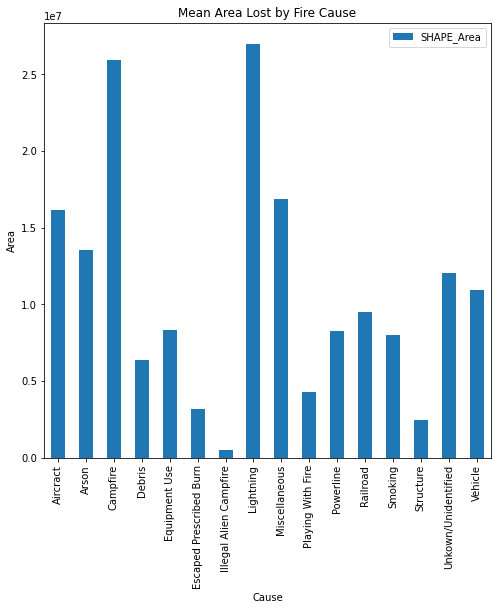

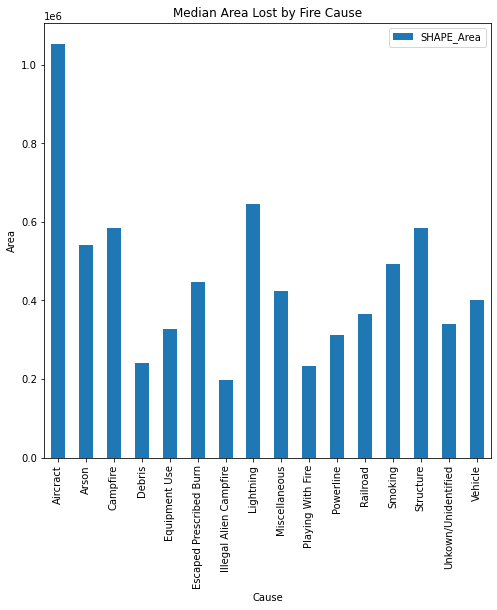

                           SHAPE_Area
CAUSE                                
Aircract                 1.617782e+07
Arson                    1.354105e+07
Campfire                 2.590246e+07
Debris                   6.355037e+06
Equipment Use            8.356924e+06
Escaped Prescribed Burn  3.173213e+06
Illegal Alien Campfire   4.840748e+05
Lightning                2.700494e+07
Miscellaneous            1.684443e+07
Playing With Fire        4.295958e+06
Powerline                8.239776e+06
Railroad                 9.520189e+06
Smoking                  7.966300e+06
Structure                2.478030e+06
Unkown/Unidentified      1.205335e+07
Vehicle                  1.095886e+07
                           SHAPE_Area
CAUSE                                
Aircract                 1.053417e+06
Arson                    5.417860e+05
Campfire                 5.844901e+05
Debris                   2.397870e+05
Equipment Use            3.282212e+05
Escaped Prescribed Burn  4.462325e+05
Illegal Alie

In [138]:
nonLightning = ["SHAPE_Length", "C_METHOD", "GIS_ACRES", "YEAR_", "ALARM_DATE", "CONT_DATE"] #removes useless data for the graphs
damageStorm = firesAll.drop(labels=nonLightning, axis=1)
damageStorm["SHAPE_Area"] = damageStorm["SHAPE_Area"].apply(lambda x: x * -1) #gets a positive value for area so the graph is displayed correctly

#calculates the means and medians for each cause
damageMean = damageStorm.groupby(["CAUSE"]).mean()#.sort_values(by="SHAPE_Area", axis=1, inplace=True)
damageMedian = damageStorm.groupby(["CAUSE"]).median()#.sort_values(by="SHAPE_Area", axis=1, inplace=True)

#graphs the means and medians for visual comparison of damage by different causes
damageMeanPlot = damageMean.plot(kind="bar", figsize=(8,8), xlabel="Cause", ylabel="Area", title="Mean Area Lost by Fire Cause")
damageMedianPlot = damageMedian.plot(kind="bar", figsize=(8,8), xlabel="Cause", ylabel="Area", title="Median Area Lost by Fire Cause")

plt.show()

print(damageMean)
print(damageMedian)

print(damageStorm)

These graphs indicate that lightning is both a frequent cause of fires, and that those fires also consume large amounts of land on average while also having a high median amount of land burned. It is fascinating to see that airplanes have such high numbers as well, despite their drastically low occurance count, literally being the least common cause. Additionally, other common human-caused fires, such as fires caused by equipment use, have relatively low amounts of land destroyed compared to other causes. Essentially, due to lightnings presence as a cause and the amount of damage that it can cause, it would be wise to acknowledge the threat that storms cause in terms of forest fires. As such, we can graph the frequency of storms and fires caused by lightning to see how aggressively these storms are responsible. The more differences between the graph, the harder it is to predict if a storm is going to result in a fire.

        BEGIN_LOCATION  BEGIN_DATE  BEGIN_TIME EVENT_TYPE  \
0            CALABASAS  03/14/1996        1600  Lightning   
1    TWENTY NINE PALMS  07/27/1996        1600  Lightning   
2        MORENO VALLEY  08/23/1996        1400  Lightning   
3               TULARE  11/22/1996        1050  Lightning   
4          BAKERSFIELD  03/22/1997        1630  Lightning   
..                 ...         ...         ...        ...   
309            MENTONE  09/09/2021        1416  Lightning   
310           LA JOLLA  09/09/2021        1700  Lightning   
311          PALM SPGS  09/24/2021        1500  Lightning   
312           LA JOLLA  10/04/2021        1800  Lightning   
313           BOSTONIA  10/04/2021        1800  Lightning   

                     SOURCE       END_LOCATION    END_DATE  END_TIME  
0                                    CALABASAS  03/14/1996      1600  
1                            TWENTY NINE PALMS  07/27/1996      1600  
2                                MORENO VALLEY  08/23/

C:\Users\XANDER~1\AppData\Local\Temp/ipykernel_29492/1191176980.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightningFires["ALARM_DATE"] = lightningFires["ALARM_DATE"].apply(lambda x: str(x)[2:10])


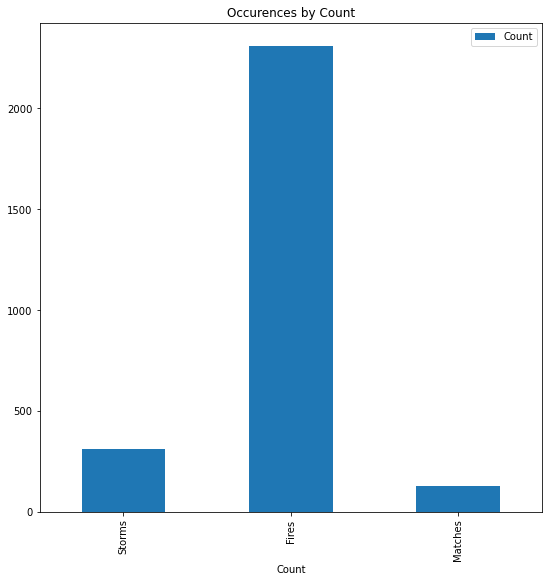

In [139]:
ignoreLabelsStorm = ["BEGIN_RANGE","END_RANGE","EVENT_ID","CZ_NAME_STR","MAGNITUDE","TOR_F_SCALE","DEATHS_DIRECT","INJURIES_DIRECT","DAMAGE_PROPERTY_NUM","DAMAGE_CROPS_NUM","STATE_ABBR","CZ_TIMEZONE","MAGNITUDE_TYPE","EPISODE_ID","CZ_TYPE","CZ_FIPS","WFO","INJURIES_INDIRECT","DEATHS_INDIRECT","FLOOD_CAUSE","TOR_LENGTH","TOR_WIDTH","BEGIN_AZIMUTH","END_AZIMUTH","BEGIN_LAT","BEGIN_LON","END_LAT","END_LON","EVENT_NARRATIVE","EPISODE_NARRATIVE","ABSOLUTE_ROWNUMBER"]

#gets the dataframe from the valuable information from the storms .csv
stormsAll = pd.read_csv("storm_data_search_results.csv", on_bad_lines="skip")

stormsAll.drop(labels=ignoreLabelsStorm, inplace=True, axis=1)

lightningFires = firesAll[firesAll.CAUSE == "Lightning"] #filters a new dataframe to only be fires caused by lightning

#removes the useless time data from the date information and formats for parsing later
# stormsAll["BEGIN_DATE"] = stormsAll["BEGIN_DATE"].apply(lambda x: str(x)[0:8])

lightningFires["ALARM_DATE"] = lightningFires["ALARM_DATE"].apply(lambda x: str(x)[2:10])
# lightningFires.loc[:, lightningFires["ALARM_DATE"]] = str(lightningFires["ALARM_DATE"])[2:10]
# lightningFires["CONT_DATE"] = lightningFires["CONT_DATE"].apply(lambda x: str(x)[2:10])
# lightningFires.sort_values(by=["YEAR_"], axis=1, inplace=True)

#parses the dates from the two data sets so pandas knows what to do with them
stormDates = pd.to_datetime(stormsAll["BEGIN_DATE"])
print(stormsAll)
print(stormDates)
lightningFireDates = pd.to_datetime(lightningFires["ALARM_DATE"], yearfirst=True, utc=False, errors="coerce")#, errors="coerce"

dateComparison = stormDates.copy()
#firesAll = firesAll[firesAll.CAUSE != "DNE"]
dateComparison = dateComparison[dateComparison.isin(lightningFireDates)]
stormCount = stormDates.count()
fireCount = lightningFireDates.count()
matchCount = dateComparison.count()
countComparison = pd.DataFrame({"Storms":[stormCount], "Fires":[fireCount], "Matches":[matchCount]})
countComparison = countComparison.transpose()
countComparison.rename(columns={0:"Count"}, inplace=True)
countComparison.rename_axis(mapper="Count", axis=0, inplace=True)
print(countComparison)

# dateComparison = pd.DataFrame()#{"Date":[], "True?":[]}
# dateComparison = pd.concat((dateComparison, stormDates))
# dateComparison.rename_axis(mapper="Date", axis=1, inplace=True)
# dateComparison = stormDates.copy()


# print(dateComparison)

# lightningFireDatePlot = lightningFireDates.plot(kind="bar", figsize=(15,15), legend=True)

countComparison.plot(kind="bar", figsize=(9,9), title="Occurences by Count")
plt.show()

# print(stormDates)
# print(lightningFires)
# print(lightningFireDates)

# print(stormsAll)
# print(lightningFires)

As indicated by the graph, there is an astounding difference between the recorded storms, the number of fires caused by lightning, and the alignment between the dates for fires and storms. This disparity indicates that better detection of fires whenever a storm passes over a vulnerable area is critical to helping limit one of the most destructive types of fires.

To focus a little more on the aspect of prediction, we are going to take a look at seasonal cycles for storms and fires in an attempt to draw a connection to see if the trends align despite the apparent lack of synchronization in the previous graph.

              count  count
year   month              
1972.0 6.0      NaN    1.0
       7.0      NaN    2.0
       8.0      NaN    8.0
       9.0      NaN    8.0
1973.0 5.0      NaN    3.0
...             ...    ...
2069.0 9.0      NaN    1.0
2070.0 6.0      NaN    2.0
       8.0      NaN    2.0
       9.0      NaN    1.0
2071.0 8.0      NaN    4.0

[328 rows x 2 columns]


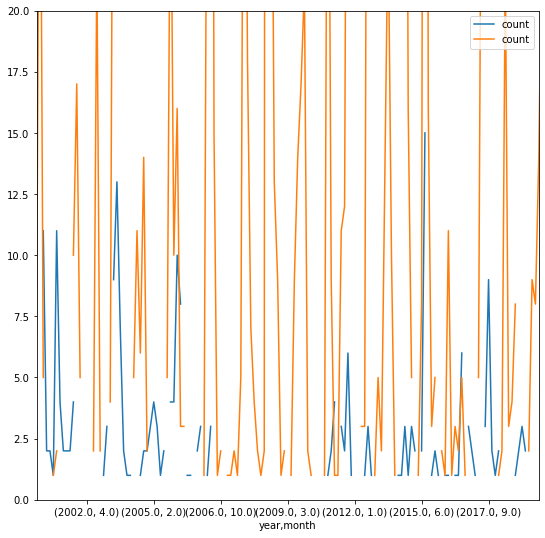

            count
year month       
1996 3          1
     7          1
     8          1
     11         1
1997 3          2
...           ...
2021 6          2
     7          3
     8          3
     9          3
     10         2

[120 rows x 1 columns]
              count
year   month       
1972.0 6.0        1
       7.0        2
       8.0        8
       9.0        8
1973.0 5.0        3
...             ...
2069.0 9.0        1
2070.0 6.0        2
       8.0        2
       9.0        1
2071.0 8.0        4

[271 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [140]:
stormDates = stormDates.groupby([stormDates.dt.year.rename("year"), stormDates.dt.month.rename("month")]).agg({"count"})
lightningFireDates = lightningFireDates.groupby([lightningFireDates.dt.year.rename("year"), lightningFireDates.dt.month.rename("month")]).agg({"count"})



# monthPlotStorm = stormDates.plot(kind="line", figsize=(9,9))
# monthPlotFire = lightningFireDates.plot(kind="line", figsize=(9,9))

monthPlot = pd.concat([stormDates, lightningFireDates], axis=1)

print(monthPlot)

monthPlot.plot(kind="line", figsize=(9,9), xlim=(125, 275), ylim=(0,20))#pd.Timestamp("2021-01-01")

# plt.xlim([pd.Timestamp("2000-01-01"), pd.Timestamp("2021-01-01")])

# monthPlot.set_xlim(pd.Timestamp("2000-01-01"), pd.Timestamp("2021-01-01"))

plt.show()

print(stormDates)
print(lightningFireDates)
print(type(stormDates))
print(type(lightningFireDates))

Even though the above graph is very fragmented, there is absolutely a discernable trend for when storms(orange) are on an increase and fires(blue) are on an increase. As one might expect, an increase in storms results in an increase in fires started by lightning, however confirming that the relationship is this close is valuable because it confirms that it is wise to be more vigilant for fires, particuarly whenever storms are on the rise.